In [1]:
#Let's play around with convolutions
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
#We'll load two images: a picture of a chinese pagoda (塔), and of a flower
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
print(batch_size, height, width, channels)

2 427 640 3


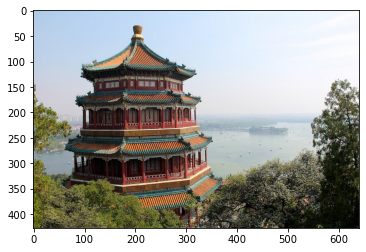

In [12]:
#The Tower of Buddhist Incense in the Summer Palace, Beijing (佛香阁)
plt.imshow(china)

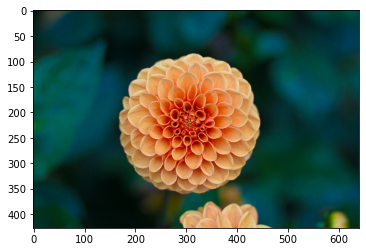

In [13]:
#A Dahlia flower (大丽花)
plt.imshow(flower)

In [27]:
#We initialize two zero filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

In [28]:
filters[:, 3, :, 0] = 1 # vertical line
print(filters[:,:,0,0])

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]


In [29]:
filters[3, :, :, 1] = 1 # horizontal line
print(filters[:,:,0,1])

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


(2, 427, 640, 2)


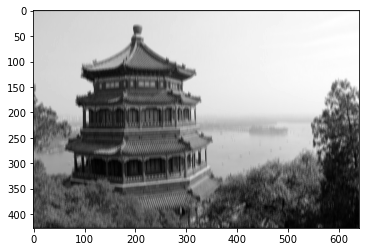

In [30]:
#We convolve the filters with the images
outputs = tf.nn.conv2d(images, filters, strides=1,padding = "SAME")
#We get two images, each now containing two channels
print(np.shape(outputs))
#Now we show the first channel of the pagoda image
plt.imshow(outputs[0, :, :, 0], cmap="gray")
plt.show()

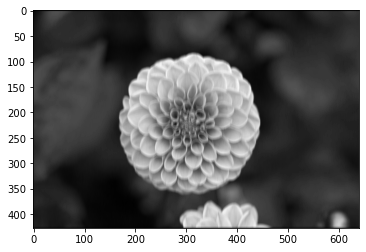

In [31]:
plt.imshow(outputs[1, :, :, 0], cmap="gray")
plt.show()

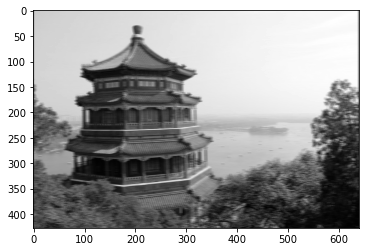

In [32]:
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

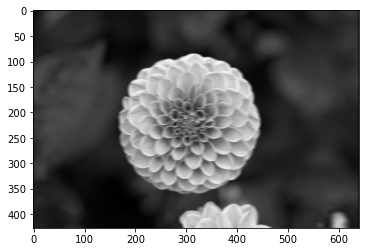

In [33]:
plt.imshow(outputs[1, :, :, 1], cmap="gray")
plt.show()

In [34]:
#Challenge 1: Make a filter that smooths the images
#Challenge 2: Make a filter that sharpens the images

In [35]:
from tensorflow import keras
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [36]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [38]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [39]:
from tensorflow.keras.utils import to_categorical

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3592 - accuracy: 0.8956 - val_loss: 0.2099 - val_accuracy: 0.9408
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1689 - accuracy: 0.9523 - val_loss: 0.1298 - val_accuracy: 0.9640
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1197 - accuracy: 0.9663 - val_loss: 0.1040 - val_accuracy: 0.9673


In [40]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


In [41]:
conv_layer = model.layers[0]
filters, biases = conv_layer.get_weights()

In [42]:
print(np.shape(filters),np.shape(biases))

(3, 3, 1, 8) (8,)


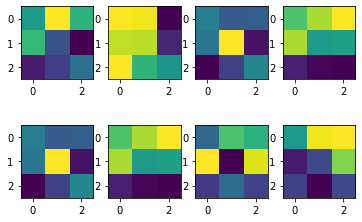

In [43]:
fig, axs = plt.subplots(2,4)
for i in range(2):
    for j in range(4):
        axs[i,j].imshow(filters[:,:,0,2*i+j])
        

In [44]:
#Challenge 3: Change the filter size to 5 or 10. Can you attach some explanation to what the filters are doing? Is accuracy
#increased or decreased? 
#Challenge 4: Decrease the number of filters to 4 or increase them to 16. What do you observe?

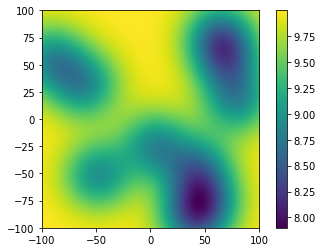

In [45]:
#Let's return to gradient descent
#We'll make an N*N grid with values ranging from -L to L
N = 100
L = 100
xsfun = np.linspace(-L,L,N)
ysfun = np.linspace(-L,L,N)
grid = np.zeros((N,N))

#Here are two default functions. The  first is a simple parabolic function. The second is made by summing
#Gaussians centered at random points.
def square(x,y):
    return x*x+y*y

np.random.seed(20)
centers = np.random.uniform(-L,L,size=(10,2))

def crazy(x,y):
    z = 0
    d = [np.exp(-1*((x - center[0])**2 + (y - center[1])**2)/1000) for center in centers]
    return 10 - np.sum(d)

#Here's what our random function looks like!
for i in range(N):
    for j in range(N):
        grid[i,j] = crazy(xsfun[i],ysfun[j])
        
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
plt.colorbar()

In [46]:
#We define a function which computes approximate gradients
def gradient(f,x,y):
    h = 0.00001
    grad_x = (f(x+h,y) - f(x,y))/h
    grad_y = (f(x,y+h) - f(x,y))/h
    #print (grad_x,grad_y)
    return (grad_x,grad_y)

#Next, we define a function which uses gradients to take steps
def step(x,y,f,eta):
    grad_x, grad_y = gradient(f,x,y)
    return x-eta*grad_x, y-eta*grad_y

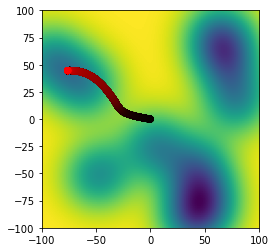

In [47]:
#Finally, let's plot the trajectory of our gradient descent from a fixed point.
#It's good, a litle slow...
x,y = (0,0)
M = 10000
eta = 1
color = np.zeros((M,3))
color[:,0] = np.linspace(0.01,1,M)
xs = []
ys = []
plt.imshow(grid,extent=[-L,L,-L,L],origin='lower')
for i in range(M):
    x,y = step(x,y,crazy,eta)
    xs.append(x)
    ys.append(y)
plt.scatter(xs,ys,color=color)

In [ ]:
#Challenge: change the code above to implement gradient descent with momentum!